In [54]:
import pandas as pd
import networkx as nx
import seaborn as sns
from pyvis.network import Network

In [4]:
trades = pd.read_csv('./databases/ds_trade.csv')
prices = pd.read_csv('./databases/ds_price_data.csv')
users = pd.read_csv('./databases/ds_master_user_static.csv')

In [31]:
trades.head(5)

,trade_id,created,major_user_id,major_currency,amount,major_fee,rate,minor_user_id,minor_currency,value,minor_fee
0,3766755,2020-12-05 02:09:46.491,6379,eth,4.119801,0.001648,569.5300,6381,usd,2346.350286,0.000000
1,4589262,2020-12-29 17:12:13.433,6380,xrp,2546.000000,1.018400,0.1812,6381,usd,461.335200,0.000000
2,3758879,2020-12-01 12:58:13.639,6379,eth,60.320572,0.000000,579.8900,6380,usd,34979.296468,13.991719
3,3784762,2020-12-05 13:01:31.952,6377,xrp,4440.570607,1.776228,0.5897,6381,usd,2618.604487,0.000000
4,4462828,2020-12-23 03:36:36.206,6378,btc,0.103375,0.000134,480214.3300,6377,mxn,49641.973882,0.000000


In [37]:
prices.head(5)

,date,major_currency,mxn,usd,ars,brl
0,2020-12-01,btc,355793.9458,17664.7246,2.555003e+06,94202.6386
1,2020-12-01,ltc,1771.3489,87.9452,1.287310e+04,468.9954
2,2020-12-01,bch,6007.6954,298.2745,4.049517e+04,1590.6419
3,2020-12-01,dai,20.1720,1.0015,1.450875e+02,5.3409
4,2020-12-01,tusd,20.0366,0.9947,1.434101e+02,5.3050


In [7]:
users.head(5)

,user_id,lastseen,gender,created,language,country_code,status,is_business,dob
0,1609,2020-01-07 21:54:56.768+00,M,2020-01-07 21:54:56.766+00,es,MX,active,f,1992-09-07
1,1612,2020-01-08 17:13:17.436+00,M,2020-01-08 17:13:17.434+00,en,AR,active,f,1992-05-19
2,1613,2020-01-08 19:20:50.17+00,M,2020-01-08 19:20:50.161+00,en,AR,active,f,1986-08-26
3,1615,2020-01-08 23:31:22.742+00,NaN,2020-01-08 23:28:54.309+00,en,MX,active,f,NaN
4,1628,2020-01-09 21:55:09.154+00,M,2020-01-09 21:55:09.153+00,es,AR,active,f,1986-12-12


In [9]:
G = nx.from_pandas_edgelist(trades, source='major_user_id', target='minor_user_id', edge_attr='value') 

In [13]:
net = Network(notebook=True)

In [14]:
net.from_nx(G)
net.show('network.html')

In [22]:
book_major = trades[['trade_id', 'created', 'major_user_id', 'major_currency', 'amount', 'major_fee', 'rate', 'value']]

In [23]:
book_major = book_major.rename(columns={'major_user_id' : 'user_id', 'major_currency' : 'currency', 'major_fee' : 'fee'})

In [24]:
book_major['side_of_trade'] = 'buyer'

In [25]:
book_minor = trades[['trade_id', 'created', 'minor_user_id', 'minor_currency', 'amount', 'minor_fee', 'rate', 'value']]

In [26]:
book_minor = book_minor.rename(columns={'minor_user_id' : 'user_id', 'minor_currency' : 'currency', 'minor_fee' : 'fee'})

In [27]:
book_minor['side_of_trade'] = 'seller'

In [28]:
book = pd.concat([book_major,book_minor])

In [44]:
book['date'] = book['created'].apply(lambda x : x[:10] )

In [48]:
book = pd.merge(book, prices, how='left', left_on=['currency', 'date'], right_on=['major_currency', 'date'])

In [69]:
book = pd.merge(book, users, how='left', left_on=['user_id'], right_on=['user_id'])

In [50]:
book = book.drop(columns=['major_currency'])

In [52]:
book['volume_usd'] = book['amount'] * book['usd']

In [73]:
book

,trade_id,created_x,user_id,currency,amount,fee,rate,value,side_of_trade,date,...,brl,volume_usd,lastseen,gender,created_y,language,country_code,status,is_business,dob
0,3766755,2020-12-05 02:09:46.491,6379,eth,4.119801,0.001648,569.530000,2346.350286,buyer,2020-12-05,...,3028.0420,2.419080e+03,2020-09-23 02:09:43.841+00,M,2020-09-23 02:09:43.786+00,en,MX,active,f,1995-12-12
1,4589262,2020-12-29 17:12:13.433,6380,xrp,2546.000000,1.018400,0.181200,461.335200,buyer,2020-12-29,...,1.1337,5.540096e+02,2020-09-23 02:12:09.056+00,M,2020-09-23 02:12:08.992+00,en,MX,active,f,1995-12-12
2,3758879,2020-12-01 12:58:13.639,6379,eth,60.320572,0.000000,579.890000,34979.296468,buyer,2020-12-01,...,3192.0770,3.610627e+04,2020-09-23 02:09:43.841+00,M,2020-09-23 02:09:43.786+00,en,MX,active,f,1995-12-12
3,3784762,2020-12-05 13:01:31.952,6377,xrp,4440.570607,1.776228,0.589700,2618.604487,buyer,2020-12-05,...,3.0058,2.587965e+03,2020-09-23 02:01:43.422+00,M,2020-09-23 02:01:43.372+00,en,MX,active,f,1995-12-12
4,4462828,2020-12-23 03:36:36.206,6378,btc,0.103375,0.000134,480214.330000,49641.973882,buyer,2020-12-23,...,124482.5031,2.466699e+03,2020-09-23 02:06:51.77+00,M,2020-09-23 02:06:51.734+00,en,MX,active,f,1995-12-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154517,4493564,2020-12-25 03:30:50.661,6377,btc,1354.000000,0.000012,0.000014,0.018915,seller,2020-12-25,...,127217.5586,3.301823e+07,2020-09-23 02:01:43.422+00,M,2020-09-23 02:01:43.372+00,en,MX,active,f,1995-12-12
154518,4052075,2020-12-12 13:58:52.836,6379,mxn,11514.487405,616.452494,10.295600,118548.556527,seller,2020-12-12,...,0.2516,5.711186e+02,2020-09-23 02:09:43.841+00,M,2020-09-23 02:09:43.786+00,en,MX,active,f,1995-12-12
154519,3894141,2020-12-08 12:32:43.037,6380,btc,2.499967,0.000038,0.030574,0.076433,seller,2020-12-08,...,96164.4202,4.694338e+04,2020-09-23 02:12:09.056+00,M,2020-09-23 02:12:08.992+00,en,MX,active,f,1995-12-12
154520,4581156,2020-12-29 13:26:30.851,6378,mxn,111.716000,0.000000,19.980000,2232.085680,seller,2020-12-29,...,0.2613,5.596972e+00,2020-09-23 02:06:51.77+00,M,2020-09-23 02:06:51.734+00,en,MX,active,f,1995-12-12


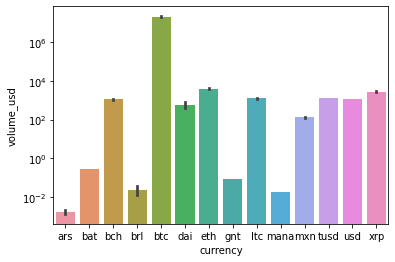

In [66]:
question1 = sns.barplot(x='currency', y='volume_usd', data=book.sort_values(by='currency', ascending=True).reset_index())
question1.set_yscale('log')

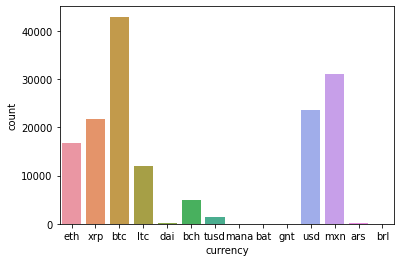

In [68]:
question2 = sns.countplot(x='currency', data=book)

In [79]:
question3 = book.groupby(by='country_code').sum()

In [80]:
question3['total'] = 'Total' 

In [82]:
question3.groupby(by='total').sum()

,trade_id,user_id,amount,fee,rate,value,mxn,usd,ars,brl,volume_usd
total,,,,,,,,,,,
Total,653901410490,984760362,2.987946e+08,5.060444e+06,8.200498e+09,5.955021e+09,1.922844e+10,9.639136e+08,1.533550e+11,4.949196e+09,9.172441e+11


In [83]:
question3

,trade_id,user_id,amount,fee,rate,value,mxn,usd,ars,brl,volume_usd,total
country_code,,,,,,,,,,,,
AR,150007415,244124,1.195904e+01,3.586360e+03,3.352495e+07,1.213962e+06,4.696452e+05,2.348531e+04,3.264806e+06,1.202984e+05,1.344704e+01,Total
BR,153230156,270211,2.513817e+04,2.767040e-03,8.927809e+06,1.026212e+07,1.619700e+07,8.152433e+05,1.108756e+08,4.210779e+06,4.527751e+08,Total
CA,57783161,48958,3.892784e+04,7.543200e-04,6.076715e+03,9.893950e+04,3.845829e+06,1.900983e+05,2.701669e+07,9.731595e+05,7.387729e+08,Total
EC,8248300,3448,3.985200e-03,0.000000e+00,4.055329e+05,8.616938e+02,2.123070e+01,1.049400e+00,1.491444e+02,5.372200e+00,1.952218e-03,Total
IN,247464588,442120,2.073288e+04,7.294896e+01,6.428098e+06,1.963032e+05,8.370290e+06,4.188946e+05,5.461922e+07,2.143468e+06,1.209716e+04,Total
MX,653146440250,983525688,2.987098e+08,5.053267e+06,8.096292e+09,5.941055e+09,1.919020e+10,9.619959e+08,1.530978e+11,4.939308e+09,9.160525e+11,Total
PE,129709064,210772,8.920923e+00,3.512872e+03,5.487142e+07,2.162750e+06,8.971664e+06,4.509869e+05,5.868912e+07,2.342471e+06,1.536798e+04,Total
PL,4128120,7351,9.996345e-01,3.998500e-04,1.914943e+04,1.914243e+04,3.845825e+05,1.900981e+04,2.701666e+06,9.731585e+04,1.900286e+04,Total
VN,4399436,7690,4.999135e-01,4.626781e+00,2.313791e+04,1.156695e+04,1.999740e+01,1.000000e+00,1.390085e+02,5.122300e+00,4.999135e-01,Total


<AxesSubplot:xlabel='date', ylabel='usd'>

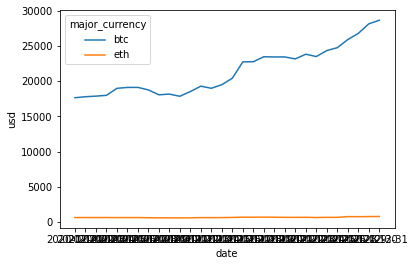

In [87]:
sns.lineplot(data=prices[prices['major_currency'].isin(['btc', 'eth'])], x='date', y='usd', hue='major_currency')

In [90]:
book_agg = book.groupby(by=['date', 'currency'], as_index=False).sum()[['date', 'currency', 'amount']]

In [93]:
book_agg = pd.merge(book_agg, prices, how='left', left_on=['currency', 'date'], right_on=['major_currency', 'date'])

In [94]:
book_agg

,date,currency,amount,major_currency,mxn,usd,ars,brl
0,2020-12-01,bch,1.955501e+03,bch,6007.6954,298.2745,4.049517e+04,1590.6419
1,2020-12-01,btc,1.126384e+06,btc,355793.9458,17664.7246,2.555003e+06,94202.6386
2,2020-12-01,dai,3.154712e+02,dai,20.1720,1.0015,1.450875e+02,5.3409
3,2020-12-01,eth,1.107448e+04,eth,12056.1557,598.5730,8.687799e+04,3192.0770
4,2020-12-01,ltc,4.652167e+03,ltc,1771.3489,87.9452,1.287310e+04,468.9954
...,...,...,...,...,...,...,...,...
249,2020-12-31,ltc,3.074723e+03,ltc,2533.7791,127.4232,1.657476e+04,661.7857
250,2020-12-31,mxn,1.572479e+06,mxn,1.0000,0.0502,6.541500e+00,0.2612
251,2020-12-31,tusd,9.069288e+04,tusd,20.0222,1.0069,1.309755e+02,5.2295
252,2020-12-31,usd,2.229118e+06,usd,19.8848,1.0000,1.300764e+02,5.1936


<AxesSubplot:xlabel='date', ylabel='amount'>

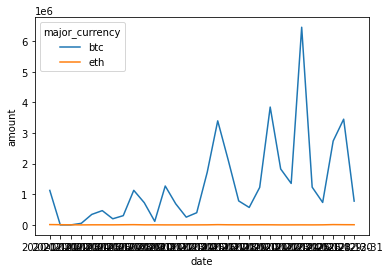

In [96]:
sns.lineplot(data=book_agg[book_agg['currency'].isin(['btc', 'eth'])], x='date', y='amount', hue='major_currency')

<AxesSubplot:xlabel='date', ylabel='usd'>

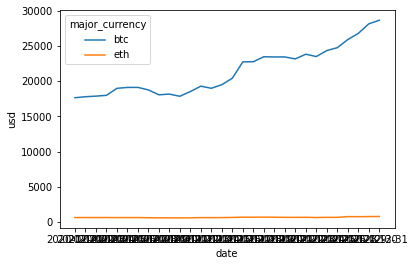

In [97]:
sns.lineplot(data=prices[prices['major_currency'].isin(['btc', 'eth'])], x='date', y='usd', hue='major_currency')